#                                      Agrégation

In [1]:
# Importation des librairies

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gd

df = pd.read_csv("patient-data-anonymisation-exercise.csv")

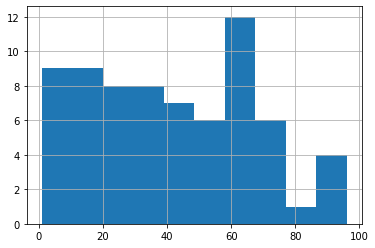

In [2]:
df = df.copy()
# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    df[c] = df[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
df = df[df.STOP==df.DEATHDATE]
df.sort_values(by="STOP", inplace=True)
df.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
df["DEATHAGE"] = df.DEATHDATE.apply(lambda x: x.year) - df.BIRTHDATE.apply(lambda x: x.year)
# Et tirez la répartition des décès, divisée en n bacs
df["DEATHAGE"].hist(bins=10)

# Résumons les données dans un nouveau tableau avec les exigences suivantes:

### Age : agrégés par chacun des déciles

### Compte : pour chaque tranche d'âge, les raisons spécifiques de la visite à l'hôpital (de DESCRIPTION)

### Totals : pour chaque tranche d'âge, total de tous les coûts des sinistres

### Médians : pour chaque tranche d'âge, la médiane de tous les coûts des sinistres

In [3]:
df["DEATHAGE_classe"]= pd.cut(df["DEATHAGE"], bins=[1,10,20,30,40,50,60,70,80,90,100],include_lowest = True)
df["DEATHAGE_classe"].head()
df1=df.groupby("DEATHAGE_classe")["DESCRIPTION"].agg(["value_counts"])
df2=df.groupby("DEATHAGE_classe")["TOTAL_CLAIM_COST"].agg(["sum","median"])
df3=df2.join(df1)
df3.columns
df3.rename(columns={'value_counts': "Nb de personnes ayant visité l'hopital par description pour chaque tranche d'âge", 'sum': "Total de tous les coûts de la demande pour chaque tranche d'âge",'median': "Médiane de tous les coûts de la demande pour chaque tranche d'âge"}, inplace=True)
df3

Total de tous les coûts de la demande pour chaque tranche d'âge  \
DEATHAGE_classe DESCRIPTION                                                                                                   
(0.999, 10.0]   Death Certification                                                                   1162.44                 
                Emergency room admission (procedure)                                                  1162.44                 
(10.0, 20.0]    Death Certification                                                                   1420.76                 
                Cardiac Arrest                                                                        1420.76                 
                Emergency Room Admission                                                              1420.76                 
                Myocardial Infarction                                                                 1420.76                 
                Emergency room admission (procedure)                                                  1420.76                 
(20.0, 30.0]    Emergency room admission (procedure)                                                   774.96                 
                Cardiac Arrest                                                                         774.96                 
                Emergency Room Admission                                                               774.96                 
                General examination of patient (procedure)                                             774.96                 
                Myocardial Infarction                                                                  774.96                 
(30.0, 40.0]    Myocardial Infarction                                                                 1033.28                 
                Emergency room admission (procedure)                                                  1033.28                 
                Cardiac Arrest                                                                        1033.28                 
                Emergency Room Admission                                                              1033.28                 
                General examination of patient (procedure)                                            1033.28                 
(40.0, 50.0]    Emergency room admission (procedure)                                                  1033.28                 
                General examination of patient (procedure)                                            1033.28                 
                Myocardial Infarction                                                                 1033.28                 
                Stroke                                                                                1033.28                 
(50.0, 60.0]    Death Certification                                                                   1162.44                 
                Encounter for check up (procedure)                                                    1162.44                 
                Cardiac Arrest                                                                        1162.44                 
                Emergency Room Admission                                                              1162.44                 
                General examination of patient (procedure)                                            1162.44                 
                Inpatient stay (finding)                                                              1162.44                 
                Stroke                                                                                1162.44                 
(60.0, 70.0]    Myocardial Infarction                                                                 1291.60                 
                Inpatient stay (finding)                                                              1291.60              